
# <span style="color:rgb(213,80,0)">Jelly roll example</span>

## We load the geometrical parameters for a jellyroll (4680 model)

In [1]:
jsonstruct_geometry = parseBattmoJson(fullfile('Examples', 'JsonDataFiles', '4680-geometry.json'));


for testing, we setup a smaller model


In [2]:
testing = true;
if testing
    fprintf('We setup a smaller case for quicker testing\n');
    rOuter = jsonstruct_geometry.Geometry.innerRadius + 3*milli*meter;
    jsonstruct_geometry.Geometry.outerRadius                         = rOuter;
    jsonstruct_geometry.Geometry.numberOfDiscretizationCellsVertical =  2;

We setup a smaller case for quicker testing


We do not include any special tab so that the whole current collector at the top and bottom is connected to the external system (tabless design).


In [3]:
    tabparams = struct('usetab', false);
    jsonstruct_geometry.NegativeElectrode.CurrentCollector.tabparams = tabparams;
    jsonstruct_geometry.PositiveElectrode.CurrentCollector.tabparams = tabparams;

end

## We load some material parameters

In [4]:
jsonstruct_material = parseBattmoJson(fullfile('ParameterData'        , ...
                                               'BatteryCellParameters', ...
                                               'LithiumIonBatteryCell', ...
                                               'lithium_ion_battery_nmc_graphite.json'));

jsonstruct_material = removeJsonStructField(jsonstruct_material, {'include_current_collectors'});

## We load the control parameters

In [5]:
jsonstruct_control = parseBattmoJson(fullfile('Examples', 'JsonDataFiles', 'cc_discharge_control.json'));

## We merge all the parameters

In [6]:
jsonstruct = mergeJsonStructs({jsonstruct_material, ...
                               jsonstruct_geometry, ...
                               jsonstruct_control});

jsonstruct.include_current_collectors = true;

output = runBatteryJson(jsonstruct);

## Battery model plots

In [7]:
model  = output.model;

G = model.grid;



We plot the full mode



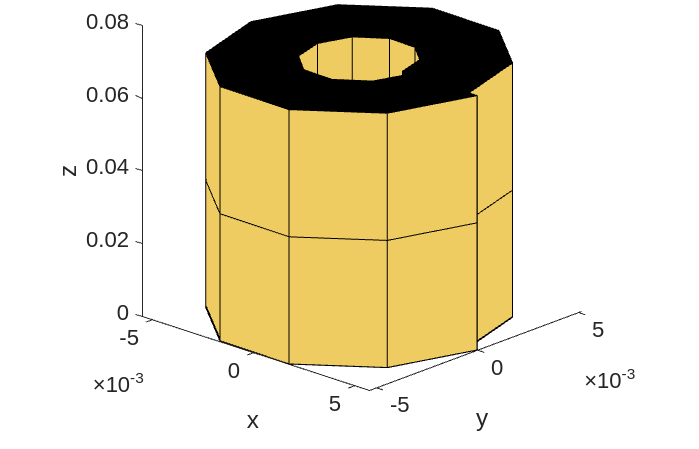

In [8]:
figure
plotGrid(G, 'facecolor', c);

c = 1/255;
c = c*[239 204 97];
cam = SetupCamera(G);
cam.cameraTarget   = [0; 0; 0.5*max(G.cells.centroids(:, 3))];
cam.cameraDistance = 0.2*meter;
cam.azimuthalAngle = 20;
cam.polarAngle     = 45;
cam.viewAngle      = 10;
cam.do();

xlabel('x');
ylabel('y');
zlabel('z');


We zoom on the top



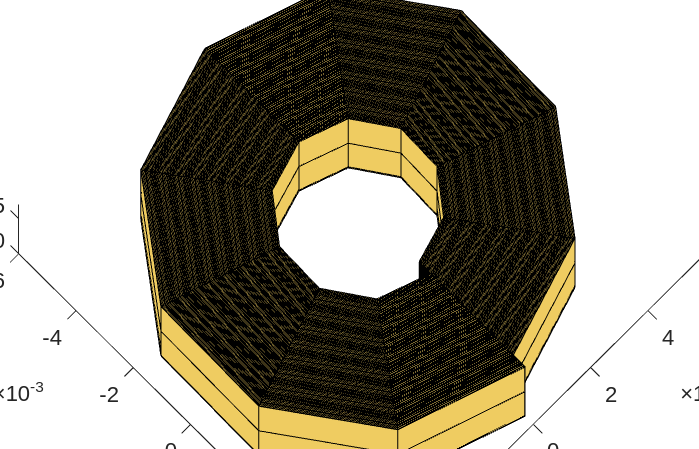

In [9]:
figure
plotGrid(G, 'facecolor', c);

cam.cameraTarget   = [0; 0; max(G.cells.centroids(:, 3))];
cam.cameraDistance = 0.3*meter;
cam.azimuthalAngle = 1;
cam.do();


We plot the different components of the models



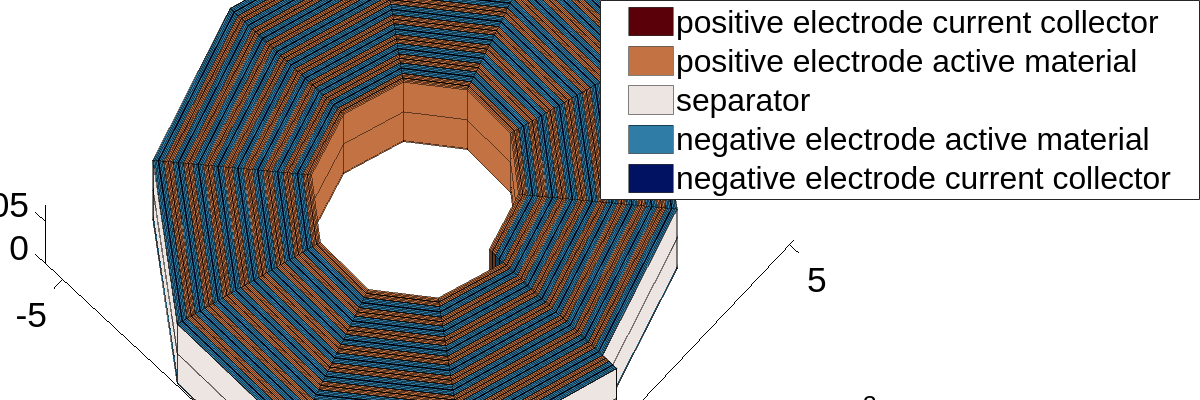

In [10]:
clear handlers
handlers = plotBatteryGrid(model, 'axisLabels', false);
cam.cameraTarget   = [0; 0; max(G.cells.centroids(:, 3))];
cam.cameraDistance = 0.3*meter;
cam.azimuthalAngle = 1;
cam.polarAngle     = 45;
cam.viewAngle      = 10;
cam.do();
f = handlers.figure;
set(f, 'Position', [0, 0, 1200, 400]);
set(gca, 'Position',[0 0 0.7 1]);
l = handlers.legend;
set(l, 'position', [0.5, .5, 0.5, 0.5])

## Process output and recover the output voltage and current from the output states.


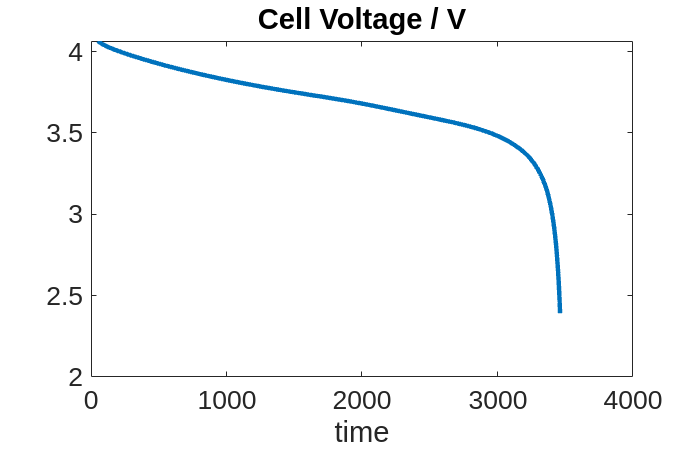

In [11]:
states = output.states;

E    = output.E;
I    = output.I;
time = output.time;

figure
plot(time, E, 'linewidth', 3);
set(gca, 'fontsize', 18);
title('Cell Voltage / V')
xlabel('time')